In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yahoo_fin import stock_info as si
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import random
import plotly.graph_objs as go 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [89]:
df = pd.read_csv('APPS.csv',header=0)

In [90]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

In [91]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

202
51


In [92]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [93]:
model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 5ms/step - loss: 66.8619
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 57.2909
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 48.4155
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 37.7523
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 25.1790
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 23.6198
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 18.6493
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 17.7777
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 15.9752
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 14.9761
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 12.5038
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 10.9061
Epoch 13/100
10/10 [=====

In [94]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)

layout = go.Layout(
    title = "APPS",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

Epoch 1/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 8.5238e-04
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 9.6193e-04
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 9.1678e-04
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 8.3791e-04
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 8.2520e-04
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 8.3920e-04
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: 8.3664e-04
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 8.2071e-04
Epoch 13/50
5/5 [========================

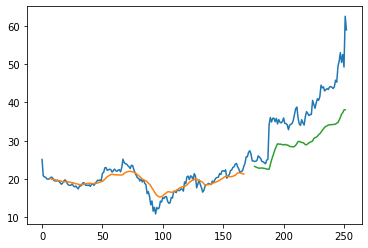